# Big Data and Analytics V2 - EMC Certification

### R-Programming Language - Walkthrough the Certification: Analyzing and Exploring Data

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT4r4wSr8WbLpsewIxDWGNXDyUDu5SzUUjrsGJgyRp9LzaCi0CL" width = "400px"></img>

##### In this Material you'll find:

<ul>
 <li>Some Basic Commands that will help you</li>
 <li>How to get Data in (Import) and out (Export) of R </li>
 <li>Visualization and Subplots</li>  
 <li>Data Types and Data Structures</li>
 <li>How to Access SQL with R </li>
</ul>

###### class() - what kind of object is it (high-level)?
##### typeof() - what is the object’s data type (low-level)?
##### length() - how long is it? What about two dimensional objects?
##### attributes() - does it have any metadata?

### Anscombe's Quartet: Same Properties, Different Data - 
<p>Just to say that mean, median, variance, std dev., they can be the same for different datasets</p>

 <img src="images/Anscombe.png" width="700" align="left">


#### Hint: Visualize before Analyze

## One Variable: Distribution and Simple Plots

#### Mutiple ways to visualize a single variable

<ul>
 <li>Plot(variable)</li>
 <li>Hist(variable)</li>
 <li>Plot(density(variable))</li>
 <li>Rug Plot - provides distribution of variable along x and y axis - rug()</li>
</ul>

#### Function to adjust size of charts

In [58]:
#function to adjust size of plots
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }
#when you want to change you have to call it #set_plot_dimensions(6, 7)

#reset to factory
windows.options(reset=TRUE)

#### Creating one variable with many values

In [59]:
#creating random uniform values from 0 to 100
random_vector = runif(200, min= 0, max = 100)
#print first 10 values
head(random_vector,10)
#show some statistical properties
summary(random_vector)

[1] 46.58125 27.80478 76.90234 57.51770 94.91961 57.77896 77.15289 95.66109
 [9] 72.75664 61.02667

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6043 24.8260 48.2883 49.8257 75.1459 98.7773 

#### Ploting the Variable

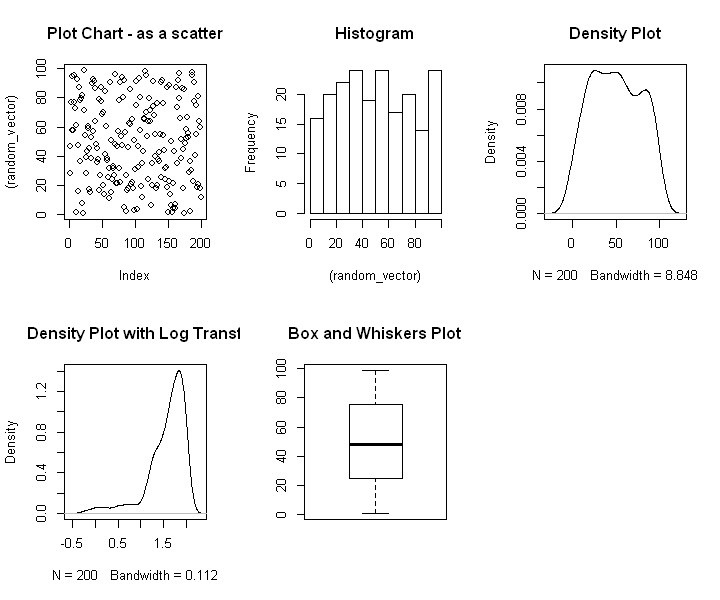

In [262]:
#different plots for the same variable
set_plot_dimensions(6,5)
#use par to plot n charts with a "rows vs columns" logic
par(mfrow=c(2,3))
plot((random_vector),main = "Plot Chart - as a scatter")
hist((random_vector),main = "Histogram")
#Density Plots: Good to see Shape of the distribution, it has a big tail? Is it normally dist.? Are there Outliers?
#density plot normalize the data somehow when using two variables to compare them
plot(density(random_vector), main = "Density Plot")
#log transf is good when you have skewed data
plot(density(log10(random_vector)), main = "Density Plot with Log Transf")
boxplot((random_vector), main = "Box and Whiskers Plot")

<h4 align="Left"> Examples of Data Distributions </h4>
<img src="images/R_EMC_Big_Data/data_distribution.png" width="450" align="Left">

## Two Variables: Analyzing Relationships

### Loading Cars Dataset from a file

In [258]:
cars <- read.csv("mtcars.csv", header=TRUE, sep=",")
#Taking a look at the Data
head(cars,5)

X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


### Building Two Boxplot and Whiskers Charts

#### We'll Plot the column gear (x-axis) vs the column horse power (y-axis), from the cars dataset

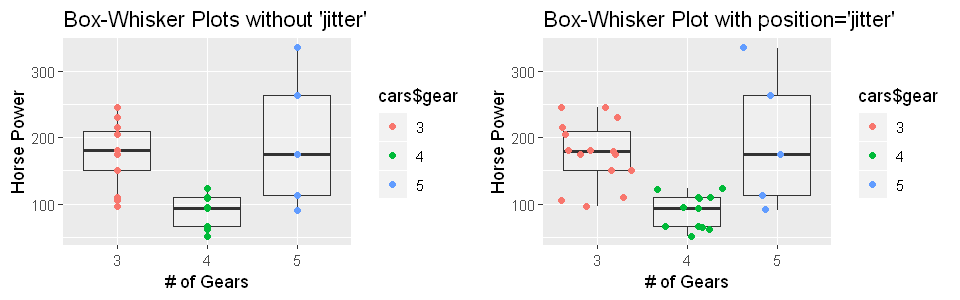

In [269]:
#installing and loading needed packages
#take the "#" out of next 3 below lines if you never installed these packages, they're needed
#install.packages("ggplot2")
#install.packages("grid")
#install.packages("gridExtra")
library(ggplot2) 
library(grid)
library(gridExtra)
#adjusting size of chart
options(repr.plot.width=8, repr.plot.height=2.5)

#should convert field to factor to be able to display different values in X
cars$gear <- as.factor(cars$gear)
#in the gem_boxplot you add the boxplot itself - alpha is color of boxplots 
#geom_point are the colorful points,
#you can add "", position="jitter"" after alpha = 1, to make the colorful ploints sparse to print
# the outlier.size=0 prevents the boxplot from plotting the outlier 
#creating plot 1 and plot 2 and storing in different variables
#ggplot is the data, geom_boxplot is the boxplot, geom_point is the colorful points
p1 <- ggplot(cars, aes(x=cars$gear, y=cars$hp)) + geom_boxplot(outlier.size=0, alpha=.2)+ geom_point(aes(colour=cars$gear), alpha=1)
p2 <- ggplot(cars, aes(x=cars$gear, y=cars$hp)) + geom_boxplot(outlier.size=0, alpha=.2)+ geom_point(aes(colour=cars$gear), alpha=1, position="jitter")
#adding title and x and y labels to p1 and p2
p1 <- p1 + ggtitle("Box-Whisker Plots without 'jitter'") + xlab("# of Gears") + ylab("Horse Power")
p2 <- p2 + ggtitle("Box-Whisker Plot with position='jitter'") + xlab("# of Gears") + ylab("Horse Power")
#print 2 charts in just one line, similar to "par()"
grid.arrange(p1, p2, nrow = 1)                                                                                                                                                                    


### Scatter Chart and Linear Regression Line with plot()

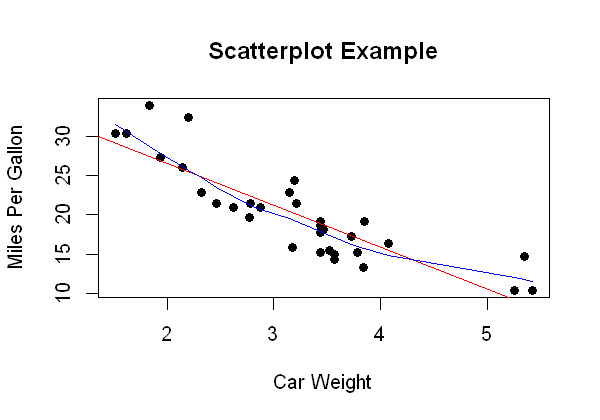

In [397]:
#using cars dataset again in "cars variable"
#pch is the type of marker
#since we're using qplot we'll reset the size of the charts:
windows.options(reset=TRUE)
#and set another size:
set_plot_dimensions(5,3.5)
plot(cars$wt, cars$mpg, main = "Scatterplot Example",xlab="Car Weight", ylab="Miles Per Gallon", pch=19) 
#regression line
#lm is the linear model function, and abline adds straight lines to the plot
abline(lm(cars$mpg~cars$wt), col="red")  
#lowess Smoothing Line (Some sort of weighting to unlock trends)
lines(lowess(cars$wt,cars$mpg), col="blue")


### Scatter Chart and Linear Regression Line with ggplot

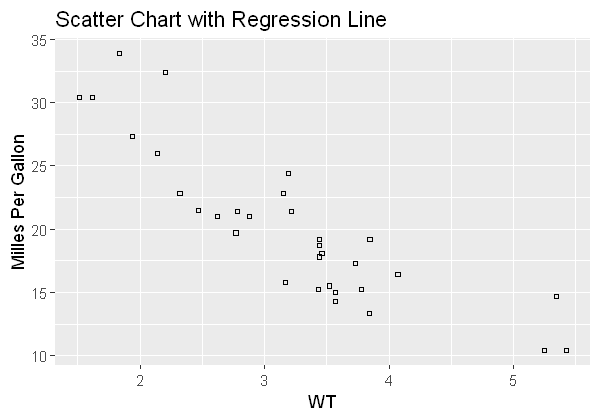

In [405]:
# GGPLOT: Basic scatter plot with title and labels
# Change the point size, and shape with size and shape, if blank use default
ggplot(cars, aes(x=cars$wt, y=cars$mpg)) + geom_point(size=1, shape=22) + 
ggtitle("Scatter Chart with Regression Line") + ylab("Milles Per Gallon") + xlab("WT")

### Pairs-Chart

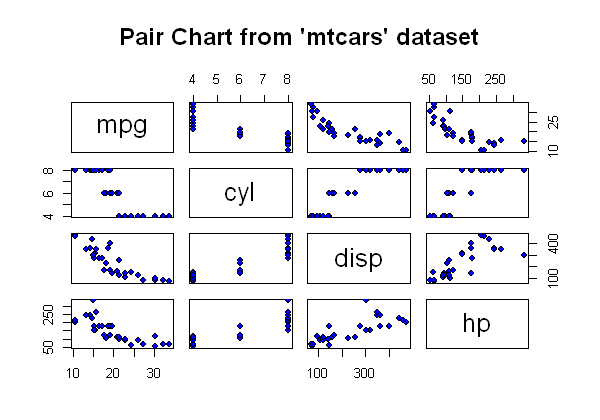

In [399]:
#subset of cars dataset for this exercise:
columns = c("mpg", "cyl", "disp", "hp")

pairs(cars[columns], main = "Pair Chart from 'mtcars' dataset", pch = 21, bg = c("blue"))